      Year  Month  Day  PO_1  PO_2  PO_3  PO_4  PO_5  PO_6  PO_7  PO_8  PO_9  \
0     2012      1    5   236   284   264   723    94    34     1     7     0   
1     2012      1    6    90   317   242   648    61    26     4    30     0   
2     2012      1    7   124   346   293   699   118    24     3    44     0   
3     2012      1    8   187   414   396   899   138    26     5    47     0   
4     2012      1    9   106   253   377   539    46     9     4    16     0   
...    ...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4602  2024      8   11  1267   261   904  1924   148   191    24   412    61   
4603  2024      8   12  1441   372  1146  2418   247   375   140   426    79   
4604  2024      8   13  1610   408  1030  2424   292   496   238   529   121   
4605  2024      8   14  1496   441  1017  2361   247   430   262   519    87   
4606  2024      8   15  1218   286  1012  2360   215   434   278   633    95   

      PO_10  PO_11  PO_12  PO_13       

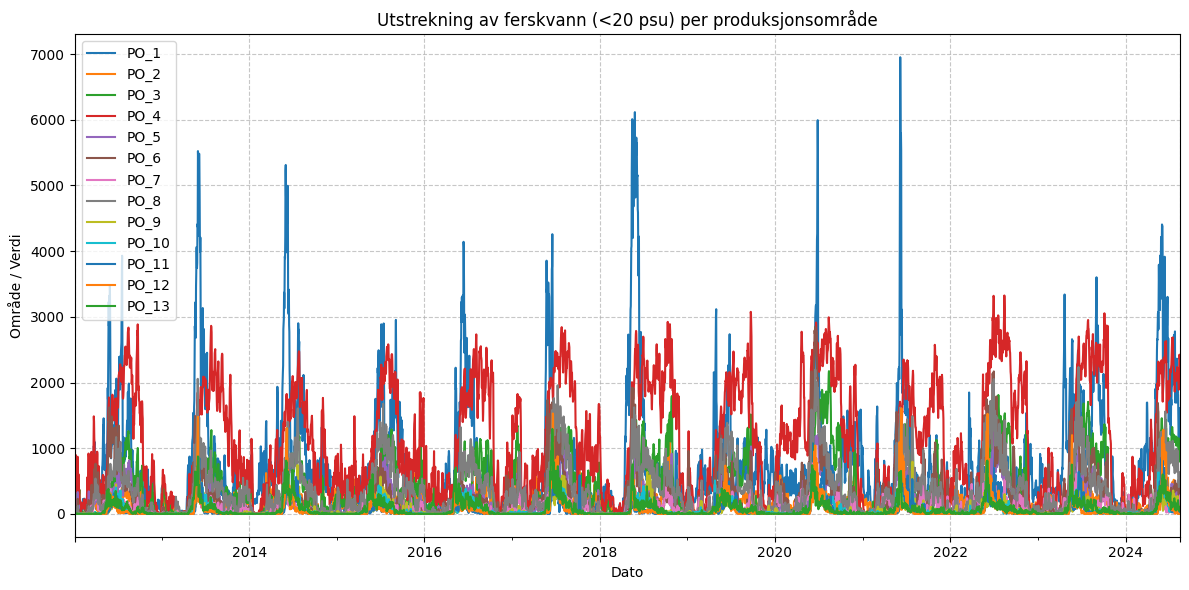

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/eirikkloosterman/Documents/bachelor/Bachelor/data/raw/times_NK800_SSSarea_Scrit20_PO.asc"

column_names = [
    "Year", "Month", "Day",
    "PO_1", "PO_2", "PO_3", "PO_4", "PO_5", "PO_6", "PO_7", "PO_8", "PO_9", "PO_10", "PO_11", "PO_12", "PO_13"
    # Oppdater antall PO_kolonner etter behov
]

df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    names=column_names
)

# Konverter kolonnene til int i tilfelle de er lest som float/str
df[["Year","Month","Day"]] = df[["Year","Month","Day"]].astype(int, errors="ignore")

# Opprett en Date-kolonne manuelt ved å formatere strengene
df["Date"] = df.apply(
    lambda row: pd.Timestamp(
        year=row["Year"],
        month=row["Month"],
        day=row["Day"]
    ),
    axis=1
)
print(df)

df.set_index("Date", inplace=True)

po_cols = [c for c in df.columns if c.startswith("PO_")]

df[po_cols].plot(figsize=(12, 6))
plt.title("Utstrekning av ferskvann (<20 psu) per produksjonsområde")
plt.xlabel("Dato")
plt.ylabel("Område / Verdi")
plt.legend(loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



file_path = "Bachelor/data/raw/times_NK800_SST_PO.asc"

df_temp = pd.read_csv(file_path, 
                      delim_whitespace=True, 
                      header=None)

# 1.2 Sett kolonnenavn: År, Måned, Dag, Område 1–13
df_temp.columns = ["År", "Måned", "Dag"] + [f"Område_{i}" for i in range(1, 14)]

# 1.3 Lag en datokolonne
df_temp["Dato"] = pd.to_datetime({
    "year": df_temp["År"],
    "month": df_temp["Måned"],
    "day": df_temp["Dag"]
})

Index(['id', 'name', 'status', 'areal', 'sjoareal', 'sjoareal_g', 'globalid',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
verdier under id: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


In [23]:
# 2.1 Les shapefilen
gdf = gpd.read_file("/Users/eirikkloosterman/Downloads/Fiskeridir_Produksjonsområder_j203b0334351e4a12945318e0daaee45e/Fiskeridir_Produksjonsområder.shp")

print(gdf.head())

# 2.2 Velg én dato, f.eks. 2012-01-09
dato = "2012-01-09"
rad = df_temp[df_temp["Dato"] == dato].iloc[0]

# 2.3 Lag DataFrame med område-id og temperatur
temp_df = pd.DataFrame({
    "id": range(1, 14),
    "Temperatur": [rad[f"Område_{i}"] for i in range(1, 14)]
})

# 2.4 Slå sammen med shapefilen
gdf_plot = gdf.merge(temp_df, on="id")

    id                      name status  areal  sjoareal  sjoareal_g  \
0  1.0  Svenskegrensen til Jæren  grønn  28989      4598        3864   
1  2.0                  Ryfylket    gul  14653      2439        1977   
2  3.0          Karmøy til Sotra    rød  15788      5681        3558   
3  4.0    Nordhordland til Stadt    rød  31103      7138        5584   
4  5.0      Stadt til Hustadvika    gul  14931      7138        3950   

                                 globalid  Shape_Leng  Shape_Area  \
0  {ED306883-08A9-45FB-8892-11ED05020D2E}         0.0         0.0   
1  {509E0825-8868-4044-8C4A-6F52BE59E499}         0.0         0.0   
2  {CAE5F09A-2A76-4B47-A783-4A4E224ED5B7}         0.0         0.0   
3  {B8B20043-99AC-4DBB-AA8F-5AF7EAA6068C}         0.0         0.0   
4  {5A649976-85BA-4D2B-A5E4-0DBDE1776532}         0.0         0.0   

                                            geometry  
0  POLYGON ((10.85439 58.9336, 10.53188 58.94733,...  
1  POLYGON ((5.36318 58.72839, 5.36061 58.

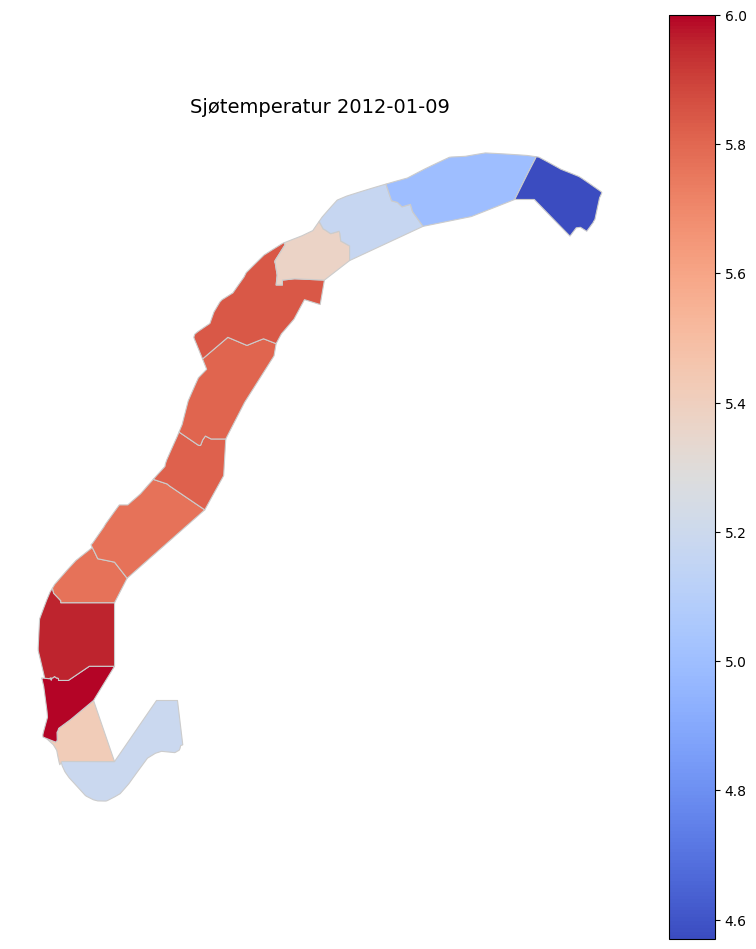

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf_plot.plot(column="Temperatur", 
              cmap="coolwarm", 
              linewidth=0.8, 
              ax=ax, 
              edgecolor="0.8", 
              legend=True)

ax.set_title(f"Sjøtemperatur {dato}", fontsize=14)
ax.set_axis_off()
plt.show()


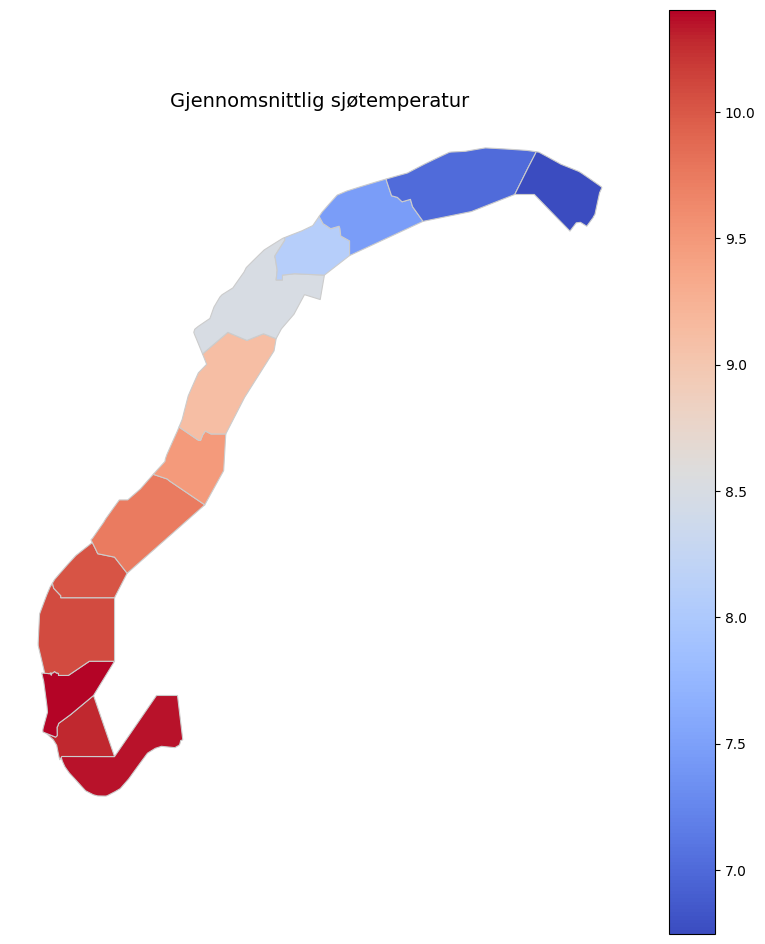

In [25]:
# Finn gjennomsnittstemperatur for hvert område over hele perioden
snitt = df_temp[[f"Område_{i}" for i in range(1, 14)]].mean()

# Lag DataFrame og koble med shapefil
snitt_df = pd.DataFrame({
    "id": range(1, 14),
    "Gjennomsnitt": snitt.values
})

gdf_snitt = gdf.merge(snitt_df, on="id")

# Plot snittkart
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf_snitt.plot(column="Gjennomsnitt", 
               cmap="coolwarm", 
               linewidth=0.8, 
               ax=ax, 
               edgecolor="0.8", 
               legend=True)

ax.set_title("Gjennomsnittlig sjøtemperatur", fontsize=14)
ax.set_axis_off()
plt.show()


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 9.7 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


/Users/eirikkloosterman/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


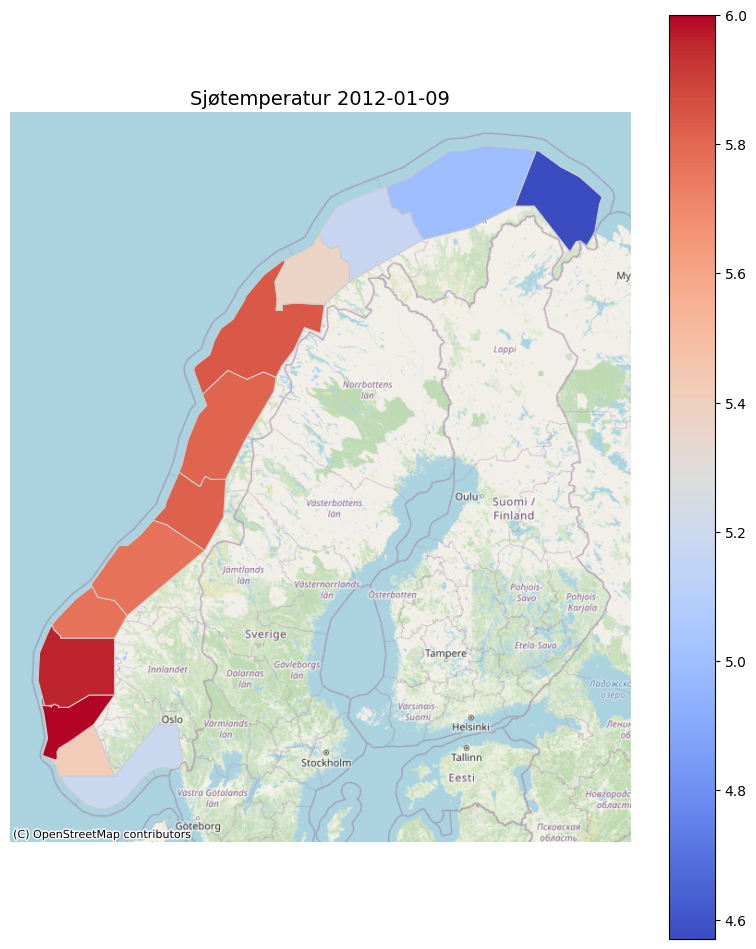

In [28]:
%pip install contextily

import contextily as cx

# Først reprojiser produksjonsdataene og evt. bakgrunnskart til EPSG:3857
gdf_web = gdf_plot.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 12))

gdf_web.plot(column="Temperatur", cmap="coolwarm", linewidth=0.8,
             ax=ax, edgecolor="0.8", legend=True)

# Legg til bakgrunnskart
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title(f"Sjøtemperatur {dato}", fontsize=14)
ax.set_axis_off()
plt.show()


CRS for produksjonsområder: EPSG:4326
CRS for Norge: EPSG:4326


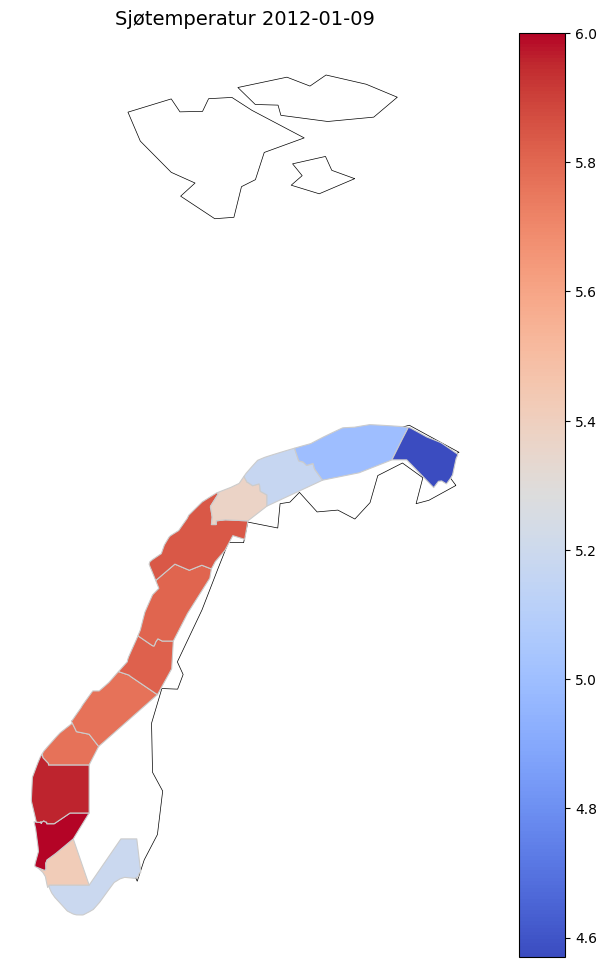

In [48]:

# Hent verdensland (inkl. Norge) fra natural earth via geopandas
land_grenser = gpd.read_file("/Users/eirikkloosterman/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Filtrer ut Norge
norge = land_grenser[land_grenser['ADMIN'] == 'Norway']
norge = norge[~((norge.bounds.miny > 70.5) & (norge.bounds.maxx > 10))]

print("CRS for produksjonsområder:", gdf_plot.crs)
print("CRS for Norge:", norge.crs)

fig, ax = plt.subplots(figsize=(10, 12))

# Plott Norges grenser
norge.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Plott produksjonsområder med temperaturdata
gdf_plot.plot(column="Temperatur", cmap="coolwarm", linewidth=0.8,
              ax=ax, edgecolor="0.8", legend=True)

ax.set_title(f"Sjøtemperatur {dato}", fontsize=14)
ax.set_axis_off()
plt.show()



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


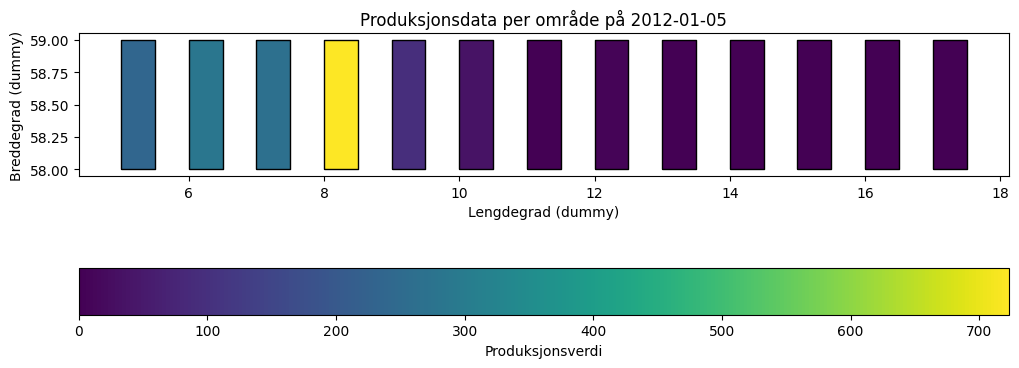

In [ ]:
%pip install geopandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon

# -------------------------------------------------
# 1. Les inn produksjonsdata fra din .asc-fil
# -------------------------------------------------
# Filen antas å være strukturert med dato (år, mnd, dag) etterfulgt av 13 tall,
# som representerer produksjonsverdien for hvert produksjonsområde.
filnavn = "/Users/eirikkloosterman/Documents/bachelor/Bachelor/data/raw/times_NK800_SSSarea_Scrit20_PO.asc"
data = np.loadtxt(filnavn)

# Lag kolonnenavn: de første tre kolonnene er dato, deretter 'Area1' til 'Area13'
kolonner = ['Year', 'Month', 'Day'] + [f"Area{i}" for i in range(1, 14)]
df = pd.DataFrame(data, columns=kolonner)

# For enkelthets skyld tar vi ut en rad – for eksempel den første – som representerer én dag
rad = df.iloc[0]
dato = f"{int(rad['Year'])}-{int(rad['Month']):02d}-{int(rad['Day']):02d}"

# Lag en egen DataFrame for produksjonsverdiene per område
produksjon_df = pd.DataFrame({
    'Area_ID': [f"Area{i}" for i in range(1, 14)],
    'Production': [rad[f"Area{i}"] for i in range(1, 14)]
})

# -------------------------------------------------
# 2. Definer (dummy) geografiske polygoner for hvert produksjonsområde
# -------------------------------------------------
# I et reelt scenario må du ha en shapefile eller et annet sett med geografiske data
# for de 13 produksjonsområdene langs norskekyst.
# Her lager vi for eksempelets skyld 13 enkle polygoner med fiktive koordinater.
# Merk: Disse koordinatene er ikke geografisk nøyaktige.
dummy_polygons = [
    Polygon([(5 + i, 58), (5.5 + i, 58), (5.5 + i, 59), (5 + i, 59)]) for i in range(13)
]

gdf = gpd.GeoDataFrame({
    'Area_ID': [f"Area{i}" for i in range(1, 14)],
    'geometry': dummy_polygons
}, crs="EPSG:4326")  # Antar WGS84; bytt om nødvendig

# -------------------------------------------------
# 3. Kombiner produksjonsdata med de geografiske polygonene
# -------------------------------------------------
merged = gdf.merge(produksjon_df, on='Area_ID')

# -------------------------------------------------
# 4. Plotting av kartet
# -------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Production', ax=ax, cmap='viridis', edgecolor='black', legend=True,
            legend_kwds={'label': "Produksjonsverdi", 'orientation': "horizontal"})
ax.set_title(f"Produksjonsdata per område på {dato}")
ax.set_xlabel("Lengdegrad (dummy)")
ax.set_ylabel("Breddegrad (dummy)")
plt.show()
